In [2]:
import numpy as np
import pandas as pd
import os
from PIL import Image

# Dataset Preprocessing

In [3]:
all_images = []
all_labels = []
main_folder_path = 'dinosaur_dataset'
folders = os.listdir(main_folder_path)

for folder in folders:
    subfolder_path = os.path.join(main_folder_path, folder)

    if os.path.isdir(subfolder_path):
        files = os.listdir(subfolder_path)
        for file in files:
            image_path = os.path.join(subfolder_path, file)
            if os.path.isfile(image_path) and file.lower().endswith(('.jpg')):
                image = Image.open(image_path)
                image = image.convert('RGB')
                image = image.resize((180, 180)) 
                img_array = np.array(image) / 255.0
                all_images.append(img_array)

all_images = np.array(all_images)



In [49]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder

### Transform predicted labels

In [5]:
class_name = [
    'Ankylosaurus',
    'Brachiosaurus',
    'Compsognathus',
    'Corythosaurus',
    'Dilophosaurus',
    'Dimorphodon',
    'Gallimimus',
    'Microceratus',
    'Parasaurolophus',
    'Pachycephalosaurus',
    'Spinosaurus',
    'Stegosaurus',
    'Triceratops',
    'Tyrannosaurus_Rex',
    'Velociraptor'
]

ankylosaurus_array = np.full(159, "Ankylosaurus")
brachiosaurus_array = np.full(163, "Brachiosaurus")
compsognathus_array = np.full(171, "Compsognathus")
corythosaurus_array = np.full(169, "Corythosaurus")
dilophosaurus_array = np.full(176, "Dilophosaurus")
dimorphodon_array = np.full(161, "Dimorphodon")
gallimimus_array = np.full(151, "Gallimimus")
microceratus_array = np.full(151, "Microceratus")
pachycephalosaurus_array = np.full(167, "Pachycephalosaurus")
parasaurolophus_array = np.full(167, "Parasaurolophus")
spinosaurus_array = np.full(166, "Spinosaurus")
stegosaurus_array = np.full(161, "Stegosaurus")
triceratops_array = np.full(167, "Triceratops")
tyrannosaurus_rex_array = np.full(161, "Tyrannosaurus_Rex")
velociraptor_array = np.full(158, "Velociraptor")

all_labels = np.concatenate((ankylosaurus_array, brachiosaurus_array, compsognathus_array,
                             corythosaurus_array, dilophosaurus_array, dimorphodon_array,
                             gallimimus_array, microceratus_array, pachycephalosaurus_array,
                             parasaurolophus_array, spinosaurus_array, stegosaurus_array,
                             triceratops_array, tyrannosaurus_rex_array, velociraptor_array))


# Create an instance of OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# Reshape the all_labels array to fit the requirements of OneHotEncoder
all_labels_reshaped = np.array(all_labels).reshape(-1, 1)

# Fit and transform the labels
one_hot_encoded_all_labels = onehot_encoder.fit_transform(all_labels_reshaped)



# Baseline DNN Model

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer, Conv2D, MaxPooling2D, BatchNormalization, Dropout, GlobalAveragePooling2D
from keras.optimizers import Adam, RMSprop, SGD

### Train Test Splits

In [54]:
from sklearn.model_selection import train_test_split

#train test split the dataset
X_train, X_test, y_train, y_test = train_test_split(all_images, one_hot_encoded_all_labels, test_size=0.2, random_state=21)

#split train into train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=21)

In [8]:
#Initialize dnn model with dense layers

def create_model():
    model=Sequential()
    model.add(InputLayer(input_shape=(180, 180,3)))
    model.add(Conv2D(32, 3, activation ='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(32, 3, activation ='relu'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(units = 64, activation = 'sigmoid' ))
    model.add(Dense(units = 15, activation ='softmax' ))
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

baseline_model= create_model()

#fitting model 
fit_history = baseline_model.fit(X_train, y_train, epochs=50, batch_size= 50, validation_data=(X_val, y_val))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2024-04-07 11:34:20.610945: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-04-07 11:34:20.610976: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-07 11:34:20.610980: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-07 11:34:20.611004: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-07 11:34:20.611018: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, p

Epoch 1/50


2024-04-07 11:34:21.745823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.0731 - loss: 2.8405 - val_accuracy: 0.0663 - val_loss: 2.6922
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.1747 - loss: 2.5665 - val_accuracy: 0.1888 - val_loss: 2.6151
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.3899 - loss: 2.2101 - val_accuracy: 0.1811 - val_loss: 2.5490
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6069 - loss: 1.7058 - val_accuracy: 0.2730 - val_loss: 2.4162
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.8233 - loss: 1.1441 - val_accuracy: 0.3061 - val_loss: 2.3583
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9380 - loss: 0.7221 - val_accuracy: 0.3036 - val_loss: 2.4012
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9876 - loss: 0.4694 - val_accuracy: 0.2857 - val_loss: 2.4809
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9861 - loss: 0.3072 - val_accuracy: 0.2985 - val_loss

In [10]:
from matplotlib import pyplot as plt

### Base Model Training and Validation Loss

/var/folders/bz/2k99f7rx4434xzdl59v798z00000gn/T/ipykernel_12732/1673537114.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')


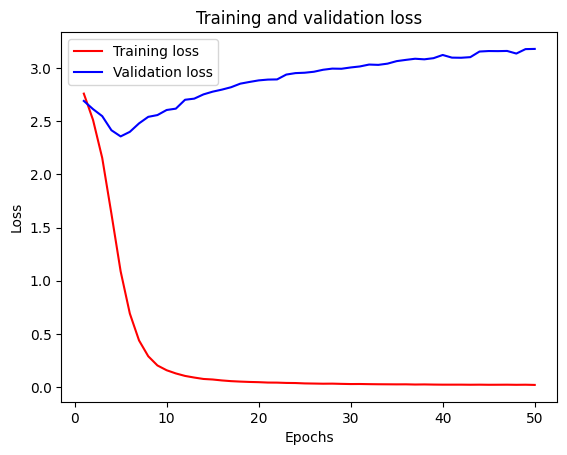

In [11]:
loss = fit_history.history['loss']
val_loss = fit_history.history['val_loss']

# Plot loss vs. val_loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.show()

We observe possible overfitting due to jagged training loss curve.

### Baseline Model Evaluation Metrics

In [12]:
from sklearn.metrics import classification_report

In [13]:
yhat_val1 = baseline_model.predict(X_val.astype(float))
yhat_val1_classes = np.argmax(yhat_val1, axis=1)
print(classification_report(np.argmax(y_val, axis=1), yhat_val1_classes))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
              precision    recall  f1-score   support

           0       0.25      0.22      0.24        36
           1       0.34      0.31      0.33        32
           2       0.35      0.37      0.36        30
           3       0.15      0.22      0.18        18
           4       0.12      0.14      0.13        28
           5       0.17      0.17      0.17        29
           6       0.08      0.06      0.06        18
           7       0.16      0.12      0.13        26
           8       0.24      0.18      0.21        22
           9       0.52      0.71      0.60        24
          10       0.33      0.19      0.24        26
          11       0.47      0.47      0.47        30
          12       0.38      0.42      0.39        36
          13       0.29      0.35      0.32        17
          14       0.48      0.55      0.51        20

    accuracy                           0.30       392
   macro avg       0.29      0.30      0

# Tuning Hyperparameters using RandomSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import keras_tuner
from keras_tuner import HyperParameters

In [15]:
X_train, X_test, y_train, y_test = train_test_split(all_images, one_hot_encoded_all_labels, test_size=0.2, random_state=21)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=21)

In [19]:
def createHPmodel(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(180, 180, 3)))
    model.add(Conv2D(
        filters=hp.Int("conv1_filters", min_value=16, max_value=64, step=16),
        kernel_size=hp.Choice("conv1_kernel", values=[3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling2D())
    model.add(Conv2D(
        filters=hp.Int("conv2_filters", min_value=16, max_value=64, step=16),
        kernel_size=hp.Choice("conv2_kernel", values=[3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(
        units=hp.Int("units", min_value=32, max_value=1024, step=32), activation='relu'))
    model.add(Dense(
        units=hp.Int("dense2_units", min_value=32, max_value=512, step=32),
        activation='sigmoid'
    ))
    model.add(Dense(15, activation='softmax'))
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [23]:
def create_tuner():   
    hp = keras_tuner.HyperParameters()
    tuner = keras_tuner.RandomSearch(
        hypermodel=createHPmodel,
        objective="val_accuracy",
        max_trials=10,
        seed=10,
        executions_per_trial=3,
        tune_new_entries=True,
        allow_new_entries=True,
        max_consecutive_failed_trials=3,
        overwrite=True
    )

    return tuner
tuner = create_tuner()

In [24]:
tuner.search(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Trial 10 Complete [00h 08m 21s]
val_accuracy: 0.09183673560619354

Best val_accuracy So Far: 0.31122449040412903
Total elapsed time: 02h 40m 38s


In [25]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 02 summary
Hyperparameters:
conv1_filters: 48
conv1_kernel: 3
conv2_filters: 48
conv2_kernel: 5
units: 128
dense2_units: 288
learning_rate: 0.0001
Score: 0.31122449040412903

Trial 03 summary
Hyperparameters:
conv1_filters: 16
conv1_kernel: 3
conv2_filters: 48
conv2_kernel: 5
units: 576
dense2_units: 192
learning_rate: 0.0001
Score: 0.31122449040412903

Trial 06 summary
Hyperparameters:
conv1_filters: 64
conv1_kernel: 5
conv2_filters: 64
conv2_kernel: 3
units: 992
dense2_units: 32
learning_rate: 0.0001
Score: 0.30527210235595703

Trial 07 summary
Hyperparameters:
conv1_filters: 16
conv1_kernel: 3
conv2_filters: 32
conv2_kernel: 5
units: 480
dense2_units: 256
learning_rate: 0.001
Score: 0.3027210831642151

Trial 00 summary
Hyperparameters:
conv1_filters: 48
conv1_kernel: 3
conv2_filters: 32
conv2_kernel: 3
units: 128
dense2_units: 512
learning_rate: 0.001
Score: 0.

In [26]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)
best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 178, 178, 48)   │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 89, 89, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 85, 85, 48)     │        57,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 42, 42, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 84672)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 84672)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    10,838,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 288)            │        37,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │         4,335 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,938,623 (41.73 MB)

 Trainable params: 10,938,623 (41.73 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
tuned_history = best_model.fit(X_train, y_train, epochs=50, batch_size= 100, validation_data=(X_val, y_val))

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 483ms/step - accuracy: 0.0614 - loss: 2.8712 - val_accuracy: 0.0561 - val_loss: 2.7218
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 456ms/step - accuracy: 0.0771 - loss: 2.7128 - val_accuracy: 0.1122 - val_loss: 2.7126
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 447ms/step - accuracy: 0.0903 - loss: 2.6979 - val_accuracy: 0.0510 - val_loss: 2.7038
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 444ms/step - accuracy: 0.1283 - loss: 2.6612 - val_accuracy: 0.0689 - val_loss: 2.6959
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 452ms/step - accuracy: 0.1316 - loss: 2.6375 - val_accuracy: 0.1122 - val_loss: 2.6872
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 443ms/step - accuracy: 0.1571 - loss: 2.5955 - val_accuracy: 0.1480 - val_loss: 2.6523
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 450ms/step - accuracy: 0.2217 - loss: 2.5437 - val_accuracy: 0.1735 - val_loss: 2.6002
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 451ms/step - accuracy: 0.2630 - loss: 2.4750 - val_accuracy: 0.

/var/folders/bz/2k99f7rx4434xzdl59v798z00000gn/T/ipykernel_12732/1335193710.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')


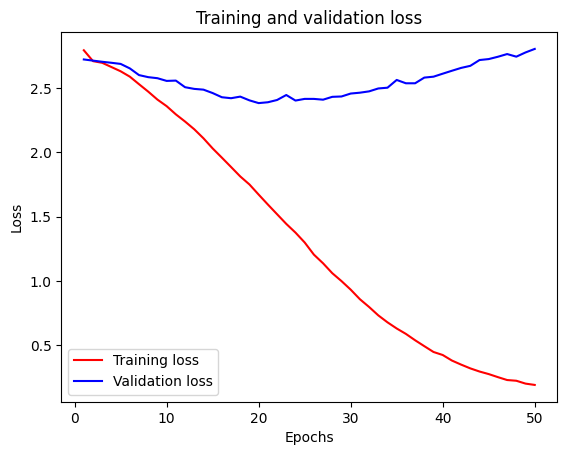

In [28]:
loss = tuned_history.history['loss']
val_loss = tuned_history.history['val_loss']

# Plot loss vs. val_loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.show()

In [29]:
yhat_train= best_model.predict(X_train.astype(float))
yhat_test= best_model.predict(X_val.astype(float))

49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [ ]:
#Saving the model
best_model.save('model.h5')

# Dinosaur Image Classifier in Practice

[0.18733594 0.0121661  0.06227931 0.10146574 0.19271687 0.04108812
 0.0776023  0.05687362 0.02513226 0.00126359 0.04403903 0.02660435
 0.15644383 0.01087453 0.00411449]
[0.04520065 0.2227728  0.0454495  0.20506197 0.01210015 0.00238872
 0.182673   0.05664741 0.04548004 0.00119344 0.07142926 0.01843717
 0.04219808 0.03192732 0.01704049]
[0.12489012 0.0070559  0.01438529 0.0032472  0.07251085 0.00751381
 0.05905916 0.00555881 0.03208836 0.4677304  0.00684305 0.01646361
 0.02285542 0.01325485 0.14654322]


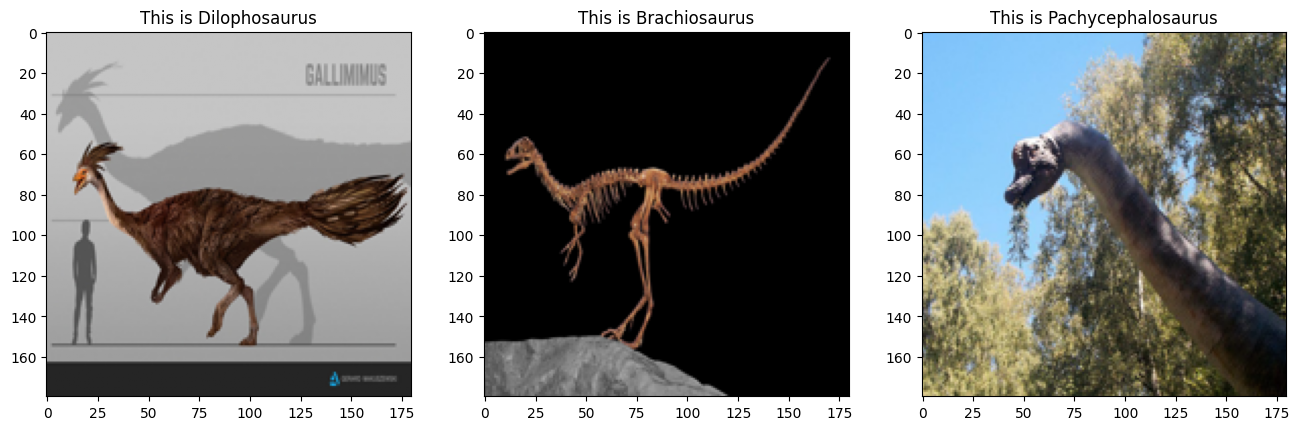

In [33]:
n = 3 
imgs = X_val.reshape([X_val.shape[0], 180, 180, 3])
fig, ax = plt.subplots(1, n, figsize=(16,8))
for ix in range(n):
    num = np.random.randint(imgs.shape[0]) 
    ax[ix].imshow(imgs[num])
    predicted_class = np.argmax(yhat_test[num])
    print(yhat_test[num])

    predicted_class_name = class_name[predicted_class]
    ax[ix].set_title('This is ' + predicted_class_name)

In [34]:
best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 178, 178, 48)   │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 89, 89, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 85, 85, 48)     │        57,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 42, 42, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 84672)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 84672)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    10,838,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 288)            │        37,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │         4,335 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,815,871 (125.18 MB)

 Trainable params: 10,938,623 (41.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,877,248 (83.46 MB)